# Executive Summary

This project concerns the use of machine learning methods to attempt to predict whether passengers aboard RMS Titanic survived or perished the shipwreck.

My overall "plan of action" is as follows:

1. Import Data
2. Exploratory Data Analysis
4. Application of Machine Learning Algorithms
5. Conclusions and Next Steps

This is my first Kaggle project, hence will also act as a project to apply my previous experience in Python and newly acquired knowledge of various Machine Learning Algorithms.

Let's begin!

# 1. Import Data

The data is split into two files, training data (on which we will conduct our analysis and train/test our model), and test data (which we will use to submit our final solutions).

It is important to note that I will from now refer to the test data as "submission data", to avoid any confusion as the training data will later be split into two parts to allow testing of the algorithms before submission. For the same reason, prior to splitting I will refer to the training data as "analysis data".

Each of the data sets is saved as a CSV file, so let's firstly reat them each into a data frame.

In [116]:
import numpy as np
import pandas as pd

analysis_data = pd.read_csv("train.csv")
analysis_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


By inspection, we can see that the analysis data containts the following features:

- PassengerID: Unique identifier for each p
- Survived: Defines whether this specific passenger survived the disastern. 0 if died, 1 if survived
- Pclass: Ticket class of passenger, ranging from 1st to 3rd class
- Name: The name of the passenger
- Sex: Whether the passenger was male or female
- Age: The age in years of the passenger
- SibSp: The cumulative number of siblings plus spouses aboard the Titanic, of the passenger
- Parch: The cumulative number of parents plus children aboard the Titanic, of the passenger
- Ticket: The ticket number
- Fare: The ticket price paid by the passenger
- Cabin: The cabin number of the passenger
- Embarked: The port of embarkation from C (Cherbourg), Q (Queenstown), or S (Southampton)

Now, importing the submission data.

In [117]:
submission_data = pd.read_csv("test.csv")
submission_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


By inspection, it is observed that submission data contains the same features as the analysis data, but without the "Survived" feature - this particular feature is what we need to try and predict in the submission data.

# 2. Exploratory Data Analysis

This section of the project can be split into several sub-parts.

Firstly, we need to assess the data for any required data munging / cleaning (e.g. incomplete / incorrect data) and feature engineering to extract which features we may want to explore.

Then, the preliminary analysis will be conducted. This will include both graphical and statistical analysis of the features to see if there is any information we can extract that may be utilised when the Machine Learning algorithms are applied.

## 2.1 Initial Considerations
Firstly, let's have an initial look at the metrics, including checking for any missing values. 

In [118]:
analysis_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The Features Age, Cabin, and Embarked have missing values. with 177, 687, and 2 missing values respectively.

There are so few Cabin numbers available we will likely discount this Feature.

Looking further at the Features using the describe method.

In [119]:
analysis_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

This shows a number of things about the analysis data, including

- Overall, c. 38% of passengers survived
- Mean age of passengers was c. 30 years old
- Mean number of parents + children with each passenger was c. 0.4
- Mean ticket price was c. 32. Note it is not clear what the units of this are.

There are different types of features: categorical, numerical (which may be subdivided between discrete and continuous), and mixed (which contains elements of numerical, and elements of categorical).

The following features are categorical, i.e. features that can take on a limit number of fixed values:

- Survived
- Sex
- Embarked
- Pclass


The following features are numerical, i.e. measureable, and change from sample to sample:

- Continuous features:
    - Age
    - Fare
    
- Disrete features:
    - SibSp
    - Parch


The following datatypes are mixed:
- Ticket
- Cabin

There is also the Name feature, which contains the title and name of the passengers. It may be worth exploring e.g. the titles of the passengers later.

## 2.2 Missing Values

As just seen, 'Age', 'Cabin', and 'Embarked' each contain several missing values - it must be considered how these missing values are dealt with.

- Cabin. As there are 687 out of 891 data points missing, it makes sense to discount this feature
- Age. It seems reasonable (without further information) to replace the missing values with the median of the 'Age' data available
- Embarked. As this is a categorical feature, the 'Mean' or 'Median' would be meaningless, therefore it seems reasonable to replace the missing values with the 'Mode' of the 'Embarked' data available

In [120]:
#Drop the Cabin column
analysis_data.drop('Cabin', axis=1, inplace=True)

#Replace the missing values in Age and Embarked with the relevant information
for passenger in analysis_data:
    analysis_data['Age'].fillna(analysis_data['Age'].median(), inplace=True)
    analysis_data['Embarked'].fillna(analysis_data['Embarked'].mode()[0], inplace=True)

We can check there are not missing values post the above transformations

In [121]:
analysis_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## 2.3 Feature Engineering

To assist our investigation it may be useful to extract new features from the data. One such potentially interesting feature is the 'Title' of each passenger, which is currently provided within the Name feature.

The below code is used to extract the 'Title' of each passenger and create a new feature from this information.

In [122]:
analysis_data['Title'] = analysis_data['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
analysis_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


It would be also helpful to know what the various different titles are and how many times each title occurs, so we can then group titles if necessary. 

In [123]:
from collections import Counter
titles = analysis_data['Title']
titles_summary = [Counter(titles).keys(), Counter(titles).values()]
titles_summary

[dict_keys(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess', 'Jonkheer']),
 dict_values([517, 125, 182, 40, 1, 6, 7, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1])]

The above shows that 'Mr', 'Mrs', 'Miss', 'Master', each appear at least 40 times, then the various other titles such as 'Rev', 'Major' etc. all appear at most seven times each. Hence let's group these other titles into a single group called 'Other'.

Let's do this with a lambda function.

In [124]:
title_names = (analysis_data['Title'].value_counts()<10)
analysis_data['Title'] = analysis_data['Title'].apply(lambda x: 'Other' if title_names.loc[x] == True else x)
analysis_data['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: Title, dtype: int64

'Age' and 'Fare' are both given to us as continuous variables.

Machine Learning Algorithms such as Decision Trees would be easier to implement if these continuous numerical variables were put into buckets.

For each of 'Fare' use qcut to group into buckets, with each populate by the same number of passengers. As a balance between over and underfitting, we set the number of buckets at five.

For 'Age' use cut to group these features into buckets, with the bucket limits determined by the maximum and minimum age of the passengers. As a balance between over and underfitting, we set the number of buckets at five

In [125]:
analysis_data['Fare_bin'] = pd.qcut(analysis_data['Fare'], 5)
analysis_data['Age_bin'] = pd.cut(analysis_data['Age'], 5)
analysis_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Fare_bin,Age_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,"(-0.001, 7.854]","(16.336, 32.252]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,"(39.688, 512.329]","(32.252, 48.168]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,"(7.854, 10.5]","(16.336, 32.252]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,"(39.688, 512.329]","(32.252, 48.168]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,"(7.854, 10.5]","(32.252, 48.168]"


## 2.4 Graphical Exploratory Data Analysis

To help explore the data, we will put together simple plots of survival rate for each of the features.


### 2.4.1 Pclass

The below plot shows that in general passengers in 1st class had a much better change of survival than passengers in 2nd class, who overall had a much better chance of survival than passengers in 3rd class.

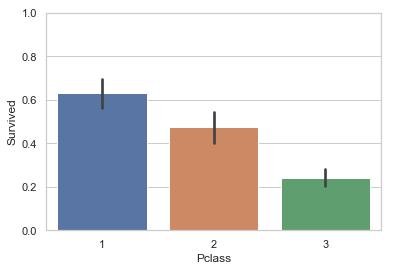

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.ylim(0,1)
sns.barplot(x='Pclass', y='Survived', data=analysis_data)

### 2.4.2 Sex
It is shown by the below graph that women survived at a much greater rate than men.

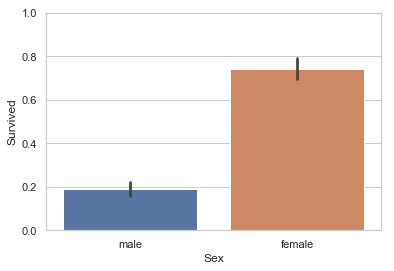

In [127]:
sns.set(style="whitegrid")
plt.ylim(0,1)
sns.barplot(x='Sex', y='Survived', data=analysis_data)

### 2.4.3 SibSp

The trend for the dependence on survival on the numbers of siblings/spouses is less clear than for e.g. sex.

The survival rate seems to peak for passengers with 1 sibling or spouse on board, decreasing for those with both more or fewer siblings/spouses than this.

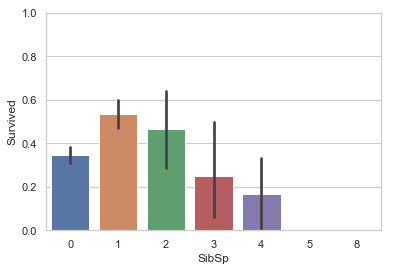

In [128]:
sns.set(style="whitegrid")
plt.ylim(0,1)
sns.barplot(x='SibSp', y='Survived', data=analysis_data)

### 2.4.4 Parch

As for the siblings/spouses feature, there is not a clear trend observable for how the number of parents/children for each passenger relates to the survival rate of that passenger.

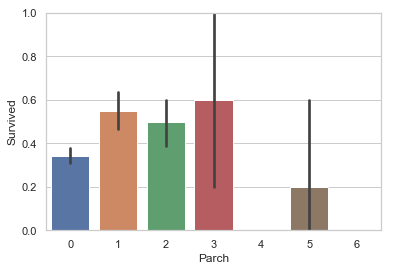

In [129]:
sns.set(style="whitegrid")
plt.ylim(0,1)
sns.barplot(x='Parch', y='Survived', data=analysis_data)

### 2.4.5 Embarked

It is shown by the below plot that passengers who embarked at Cherbourg stood the best change of survival with passngers who embarked at Queenstown and Southhampton standing a much worse change of survival.

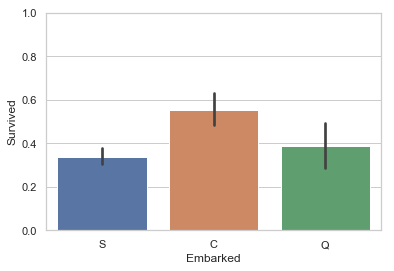

In [130]:
sns.set(style="whitegrid")
plt.ylim(0,1)
sns.barplot(x='Embarked', y='Survived', data=analysis_data)

### 2.4.6 Title

As you may expect from our finding relation to the survival rate by the sex of the passengers, passengers with female titles such as Mrs and Miss had much higher rates of survival than the male title Mr.


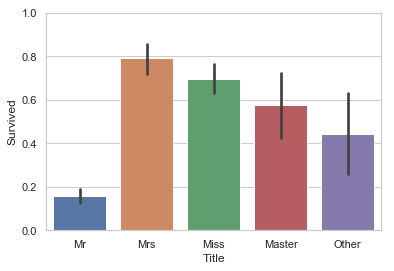

In [131]:
sns.set(style="whitegrid")
plt.ylim(0,1)
sns.barplot(x='Title', y='Survived', data=analysis_data)

### 2.4.7 Fare_bin

The plot clearly shows that the survival rate for passengers in the highest Fare_bin (i.e. passengers with tickets that cost more) had an increased survival rate vs those in the lowest Fare_bin.

Interestingly, between the cheaper fare, there is little differenc in the survival rate.

Each of these survival rates may be affected by the way the bins are divided - the lowest two bins include passengers who paid 0 to 10.5, whereas the highest Fare_bin includes passengers who paid from 40 to over 500.

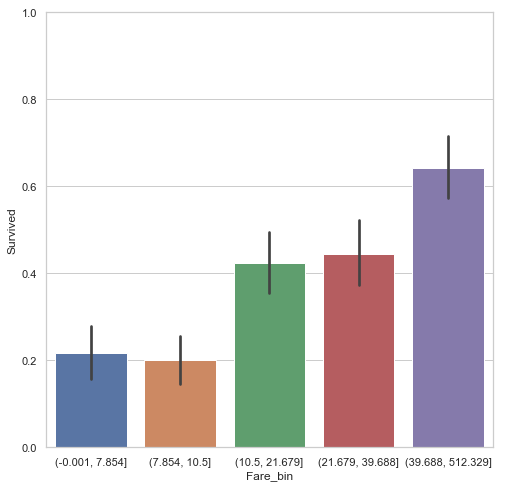

In [132]:
from matplotlib import pyplot
sns.set(style="whitegrid")
a4_dims = (8,8)
fig, ax = pyplot.subplots(figsize=a4_dims)
plt.ylim(0,1)
g = sns.barplot(x='Fare_bin', y='Survived', data=analysis_data)

### 2.4.8 Age_bin

It is shown that those under 16 years old stood the best chance of survival (presumably a consequence of a "women and children first" policy), and those over 64 stood the worse chance of survival (maybe due to their relative physical weakness)

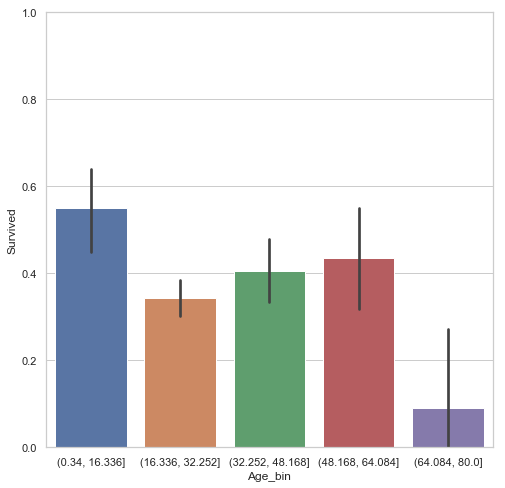

In [133]:
from matplotlib import pyplot
sns.set(style="whitegrid")
a4_dims = (8,8)
fig, ax = pyplot.subplots(figsize=a4_dims)
plt.ylim(0,1)
g = sns.barplot(x='Age_bin', y='Survived', data=analysis_data)

Of course, much more detailed graphical analysis may be conducted looking at how the different features interact, however for simplicity I will not go into that here.

I will now move onto use of Machine Learning Algorithms to try and predict which of the passengers survived.

# 3. Application of Machine Learning Algorithms

## 3.1. Preprocessing of Data
Now, moving onto the use of Machine Learning Algorithms predict the survival of the passengers.

To make the training and validation an easier process, several of the features (Sex, Embarked, Title, Fare_bin, and Age_bin) will be converted to numbers using label encoding.

This will be done using SkLearn LabelEncoder.

In [134]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

for data in analysis_data:
    analysis_data['Sex_Code'] = label.fit_transform(analysis_data['Sex'])
    analysis_data['Embarked_Code'] = label.fit_transform(analysis_data['Embarked'])
    analysis_data['Title_Code'] = label.fit_transform(analysis_data['Title'])
    analysis_data['Fare_bin_Code'] = label.fit_transform(analysis_data['Fare_bin'])
    analysis_data['Age_bin_Code'] = label.fit_transform(analysis_data['Age_bin'])

analysis_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Fare_bin,Age_bin,Sex_Code,Embarked_Code,Title_Code,Fare_bin_Code,Age_bin_Code
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,"(-0.001, 7.854]","(16.336, 32.252]",1,2,2,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,"(39.688, 512.329]","(32.252, 48.168]",0,0,3,4,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,"(7.854, 10.5]","(16.336, 32.252]",0,2,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,"(39.688, 512.329]","(32.252, 48.168]",0,2,3,4,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,"(7.854, 10.5]","(32.252, 48.168]",1,2,2,1,2


At this point, the relevant features to be used to train and test the MLAs are extracted.

The relevant x variables (i.e. independent/features/explanatory/predictor variables) are
- Pclass
- SibSp
- Parch
- Sex_Code
- Embarked_Code
- Title_Code
- Fare_bin_Code
- Age_bin_Code

The relevant y variables (i.e. dependent/target/outcome/response) are
- Survived

In [135]:
analysis_data_X = analysis_data[['Pclass', 'SibSp', 'Parch', 'Sex_Code', 'Embarked_Code', 'Title_Code', 'Fare_bin_Code', 'Age_bin_Code']]
analysis_data_y = analysis_data['Survived']

analysis_data_X.head()

,Pclass,SibSp,Parch,Sex_Code,Embarked_Code,Title_Code,Fare_bin_Code,Age_bin_Code
0,3,1,0,1,2,2,0,1
1,1,1,0,0,0,3,4,2
2,3,0,0,0,2,1,1,1
3,1,1,0,0,2,3,4,2
4,3,0,0,1,2,2,1,2


It is then necessary to split the analysis data into two parts (as discusssed earlier):
- Data for training the MLA
- Data for testing the MLA
    
This is done using train_test_split imported from scikit-learn.

In [136]:
from sklearn.model_selection import train_test_split
analysis_data_X_train, analysis_data_X_test, analysis_data_y_train, analysis_data_y_test = train_test_split(analysis_data_X, analysis_data_y, test_size = 0.3, random_state=42, stratify=analysis_data_y)

## 3.2 Use of MLA on Analysis Data

As this is my first Kaggle competition, I have decided to focus on one specific Machine Learning Algorithm: the k-Nearest Neighbors ("kNN") algorithm.

KNN is a supervised learning algorithm, which when used in its simplest form for classification (as in this application), looks at the classification of the k nearest neighbors of a data point to assign the modal classification to this new data point. (For regrression the algorithm works in an analogous way but gives the new data point the mean value of the k nearest neighbors).

By nearest neighbors, we are considering those with the closest independent features.

It should be noted that there are other versions of the kNN algorithm which consider e.g. weighting of data points, however these will not be explored or utilised here.

To demonstrate the use of kNN, let's consider applying this algorithm with k = number of neighbors to consider set to one (i.e. each new data point will be classified as 'Survived' if its nearest neighbor was 'Survived', and 'Died' if the nearest neighbor is 'Died'.

In [137]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(analysis_data_X_train, analysis_data_y_train)
knn.score(analysis_data_X_test, analysis_data_y_test)

0.7723880597014925

We can then expand and optimise this algorithm to look at a range of value for the number of neighbors. 

The simplest way to do is to use a for loop to execute the kNN algorithm for a range of different k values (on both training and testing data) and draw a graph of the results. This graph will then be used to select a potential optimum value of k for the algorithm to be used on the submission data.

Let's consider k = 1 through 25.

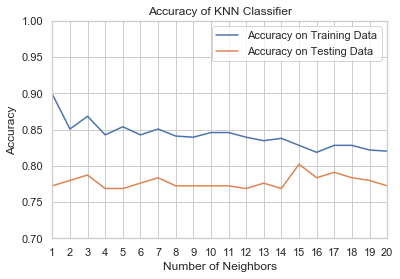

In [138]:
neighbors = np.arange(1,21)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for b, k in enumerate(neighbors):
    
    #KNN Classifier with k neighbors is set up
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the classifier to the training data
    knn.fit(analysis_data_X_train, analysis_data_y_train)
    
    #Calculate the accuracy of the classifier on the training data
    train_accuracy[b] = knn.score(analysis_data_X_train, analysis_data_y_train)
    
    #Use the classifier on the testing data, and predict the accuracy
    test_accuracy[b] = knn.score(analysis_data_X_test, analysis_data_y_test)

from matplotlib import pyplot as plt
plt.title('Accuracy of KNN Classifier')
plt.plot(neighbors, train_accuracy, label = 'Accuracy on Training Data')
plt.plot(neighbors, test_accuracy, label = 'Accuracy on Testing Data')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neighbors)
plt.xlim(1,20)
plt.ylim(0.7, 1)
plt.show()

The optimal value of k would be a number at which maximises both the accuracy on training data and the accuracy on testing data. Therefore, from the above graph, a value of k of 3 is chosen to be used for the application of kNN to the submission data.

## 3.3 Use of MLA on Submission Data
### 3.3.1 Transformation & Preprocessing of Submission Data
In order for the chosen MLA to be applied to the submission data, the data must undergo the same transformations as were applied to the analysis data.

The data is first inspected for any missing values

In [139]:
submission_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

As was the case for the analysis data, a number of features in the submission data contain missing values and hence must be dealth with as they were in the analysis data.

In the case of the subbmision data, one passenger has missing data for Fare. The modal value for fare is assigned to this passenger

In [140]:
#Drop the Cabin column
submission_data.drop('Cabin', axis=1, inplace=True)

#Replace the missing values in Age and Embarked with the relevant information
for passenger in submission_data:
    submission_data['Age'].fillna(submission_data['Age'].median(), inplace=True)
    submission_data['Embarked'].fillna(submission_data['Embarked'].mode()[0], inplace=True)
    submission_data['Fare'].fillna(submission_data['Fare'].mode()[0], inplace=True)

Now each of the missing data points has been dealt with, the transformation that were executed for the analysis data may be applied to the submission data.

In [141]:
#Extract a new feature givin the Title of the passenger
submission_data['Title'] = submission_data['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

#Group the titles which occur fewer than 10 times into Other
title_names_submission = (submission_data['Title'].value_counts()<10)
submission_data['Title'] = submission_data['Title'].apply(lambda x: 'Other' if title_names_submission.loc[x] == True else x)
submission_data['Title'].value_counts()


#Group Fare and Age into buckets
submission_data['Fare_bin'] = pd.qcut(submission_data['Fare'], 5)
submission_data['Age_bin'] = pd.cut(submission_data['Age'], 5)
submission_data.head()



#Convert features into numbers where necessary
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

for data in submission_data:
    submission_data['Sex_Code'] = label.fit_transform(submission_data['Sex'])
    submission_data['Embarked_Code'] = label.fit_transform(submission_data['Embarked'])
    submission_data['Title_Code'] = label.fit_transform(submission_data['Title'])
    submission_data['Fare_bin_Code'] = label.fit_transform(submission_data['Fare_bin'])
    submission_data['Age_bin_Code'] = label.fit_transform(submission_data['Age_bin'])



The relevant x variables (i.e. independent/features/explanatory/predictor variables) for the submission data are then extracted.

In [142]:
#Extract the relevant independent Features  
submission_data_X = submission_data[['Pclass', 'SibSp', 'Parch', 'Sex_Code', 'Embarked_Code', 'Title_Code', 'Fare_bin_Code', 'Age_bin_Code']]
submission_data_X.head()

,Pclass,SibSp,Parch,Sex_Code,Embarked_Code,Title_Code,Fare_bin_Code,Age_bin_Code
0,3,0,0,1,1,2,1,2
1,3,1,0,0,2,3,0,3
2,2,0,0,1,1,2,1,4
3,3,0,0,1,2,2,1,1
4,3,1,1,0,2,3,2,1


The submission data is now ready for application of the kNN algorithm.

### 3.3.2 Application of kNN on the Submission Data
The chosen algorithm of kNN with k equal to 3 is applied to the preprocessed submission data. The application is used to create y_pred (which is an array of the predicted survival / death of each passenger. This array is combined with each PassengerId, and converted to a CSV file to give the submission file.

In [143]:
#Use of the kNN to predict the survival/death of each passenger (with the analysis data used to train the algorithm)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(analysis_data_X_train, analysis_data_y_train)
y_pred = knn.predict(submission_data_X)

#Transformation of predictions into a dataframe
y_pred_df = pd.DataFrame(y_pred)

#Creation of an empty dataframe into which the predictions will be added and submitted
attempt_df = pd.DataFrame(columns=['PassengerId', 'Survived']) 

#Population of the submission dataframe
attempt_df['PassengerId'] = submission_data['PassengerId']
attempt_df['Survived'] = y_pred_df

#Conversion of the submission dataframe to a CSV file
attempt_df.to_csv('attempt.csv', index=False)

The CSV file containing my predictions was then uploaded to the Kaggle website, which informed me I had scored c. 75.6% (i.e. I had correctly predicted whether c. 75.6% of the passengers within the submission data set had survived or died)

# 4. Conclusions and Next Steps

My score means there is much to be improved on. On Machine Learning future projects I plan to:
    
- Use a range of Machine Learning Algorithms such as Decision Trees and Naive Bayes Classifiers
- Conduct more rigorous Exploratory Data Analysis. For examples, using statistical tests on the data to draw any potentially helpful conclusions
- Delve more deeply into Feature Engineering and its potentially applications - which I briefly explored here when looking at the titles of the passengers


In conclusion, this has been an interesting learning experience, which I will look to build upon going forward.